In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading th dataset
df = pd.read_csv('screen_time.csv')

In [5]:
# Missing data check
print("Missing data:\n", df.isnull().sum())

Missing data:
 Age                            0
Gender                         0
Screen Time Type               0
Day Type                       0
Average Screen Time (hours)    0
Sample Size                    0
dtype: int64


In [6]:
# Checking data types
print("Data types:\n", df.dtypes)

Data types:
 Age                              int64
Gender                          object
Screen Time Type                object
Day Type                        object
Average Screen Time (hours)    float64
Sample Size                      int64
dtype: object


In [7]:
# Outlier detection (for Average Screen Time)
Q1 = df['Average Screen Time (hours)'].quantile(0.25)
Q3 = df['Average Screen Time (hours)'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Average Screen Time (hours)'] < Q1 - 1.5 * IQR) | (df['Average Screen Time (hours)'] > Q3 + 1.5 * IQR)]
print("Outlier:\n", outliers)

Outlier:
 Empty DataFrame
Columns: [Age, Gender, Screen Time Type, Day Type, Average Screen Time (hours), Sample Size]
Index: []


In [8]:
# Average screen time by age group
age_group_avg = df.groupby('Age')['Average Screen Time (hours)'].mean().reset_index()
print("Average screen time by age group:\n", age_group_avg)

Average screen time by age group:
     Age  Average Screen Time (hours)
0     5                     1.142778
1     6                     1.490000
2     7                     1.878333
3     8                     2.260556
4     9                     2.609444
5    10                     3.003889
6    11                     3.374444
7    12                     3.715000
8    13                     4.117222
9    14                     4.470556
10   15                     4.861111


In [9]:
# Pivoting data based on gender and screen use type
pivot_table = df.pivot_table(values='Average Screen Time (hours)',
                             index='Gender',
                             columns='Screen Time Type',
                             aggfunc='mean')
print("Average by Gender and Screen Time Type:\n", pivot_table)

Average by Gender and Screen Time Type:
 Screen Time Type         Educational  Recreational     Total
Gender                                                      
Female                      1.273182      3.099545  4.373636
Male                        1.226818      3.377727  4.605455
Other/Prefer not to say     1.180909      3.309545  4.490455


In [10]:
# Weekday vs. weekend comparison
day_type_avg = df.groupby(['Day Type', 'Age'])['Average Screen Time (hours)'].mean().unstack().T
print("Weekday vs. Weekend:\n", day_type_avg)

Weekday vs. Weekend:
 Day Type   Weekday   Weekend
Age                         
5         1.000000  1.285556
6         1.326667  1.653333
7         1.660000  2.096667
8         1.995556  2.525556
9         2.336667  2.882222
10        2.647778  3.360000
11        2.985556  3.763333
12        3.341111  4.088889
13        3.655556  4.578889
14        3.998889  4.942222
15        4.324444  5.397778


In [11]:
# Segmenting by age
df['age_group'] = pd.cut(df['Age'], bins=[4, 8, 12, 15], labels=['5-8 Yaş', '9-12 Yaş', '13-15 Yaş'])
age_segment_avg = df.groupby('age_group')['Average Screen Time (hours)'].mean()
print("Average by Age Segments:\n", age_segment_avg)

Average by Age Segments:
 age_group
5-8 Yaş      1.692917
9-12 Yaş     3.175694
13-15 Yaş    4.482963
Name: Average Screen Time (hours), dtype: float64


/var/folders/gy/p2f478d90075t1cdm_4jnf580000gn/T/ipykernel_26075/1166618677.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_segment_avg = df.groupby('age_group')['Average Screen Time (hours)'].mean()


Text(0, 0.5, 'Average Screen Time (hours)')

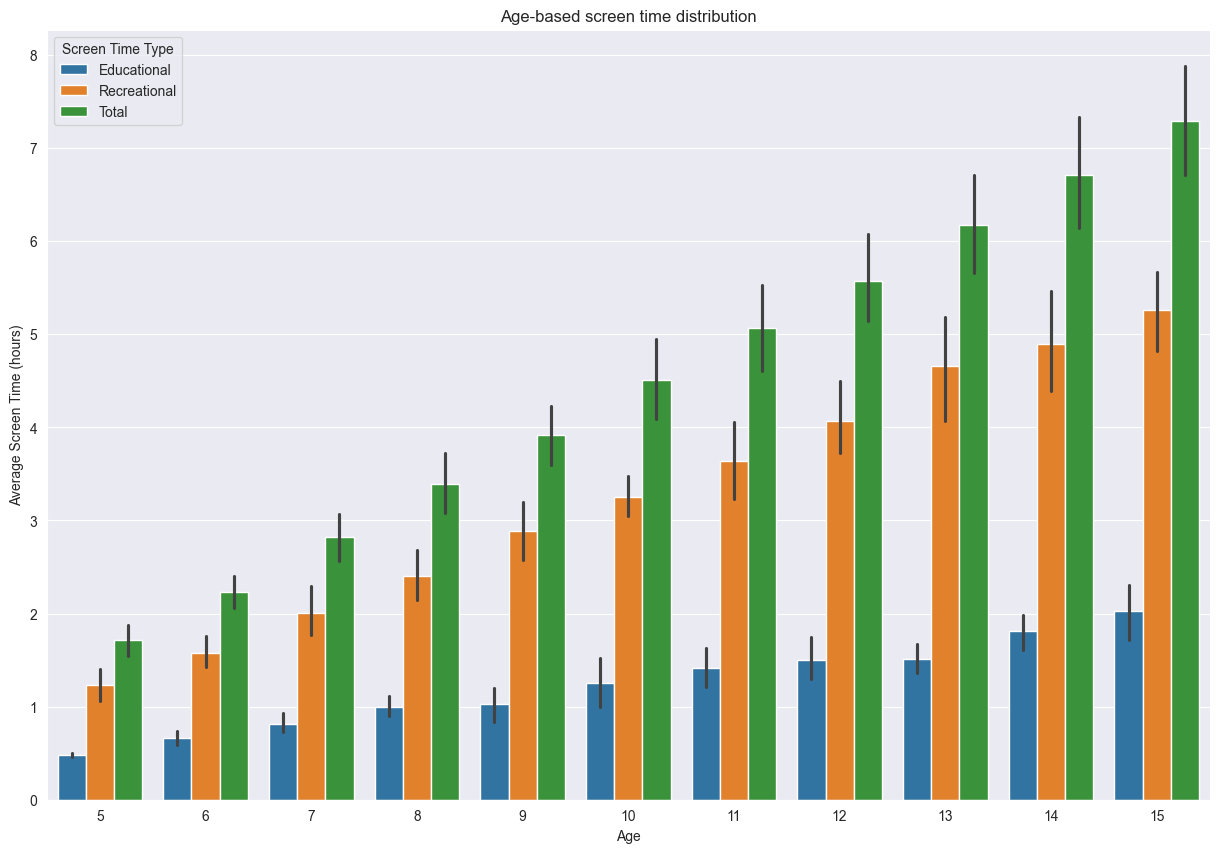

In [12]:
fig = plt.figure(figsize=(15, 10))
sns.barplot(
    data=df,
    x='Age',
    y='Average Screen Time (hours)',
    hue='Screen Time Type')
plt.title('Age-based screen time distribution')
plt.xlabel('Age')
plt.ylabel('Average Screen Time (hours)')


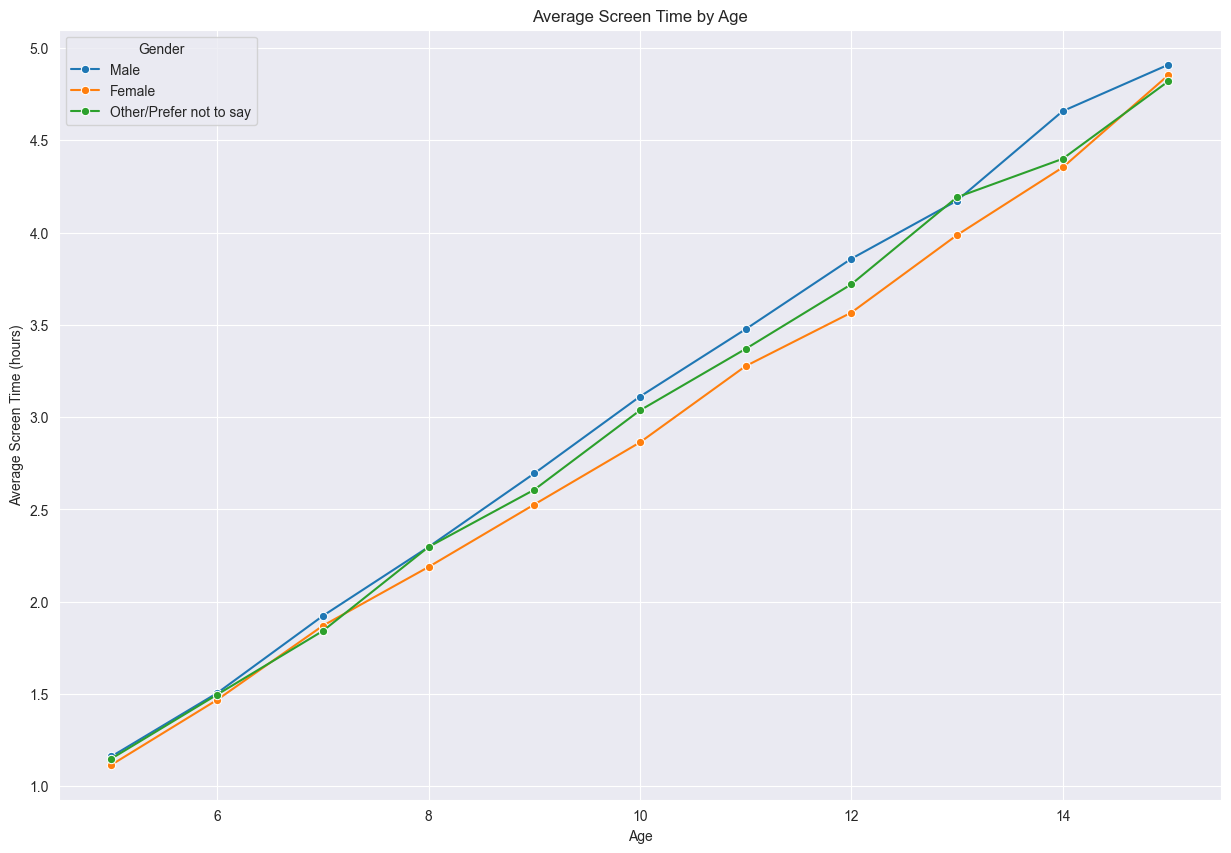

In [13]:
fig = plt.figure(figsize=(15, 10))
sns.lineplot(
    data=df,
    x='Age',
    y='Average Screen Time (hours)',
    hue='Gender',
    marker='o',
    errorbar=None)
plt.title('Average Screen Time by Age')
plt.show()

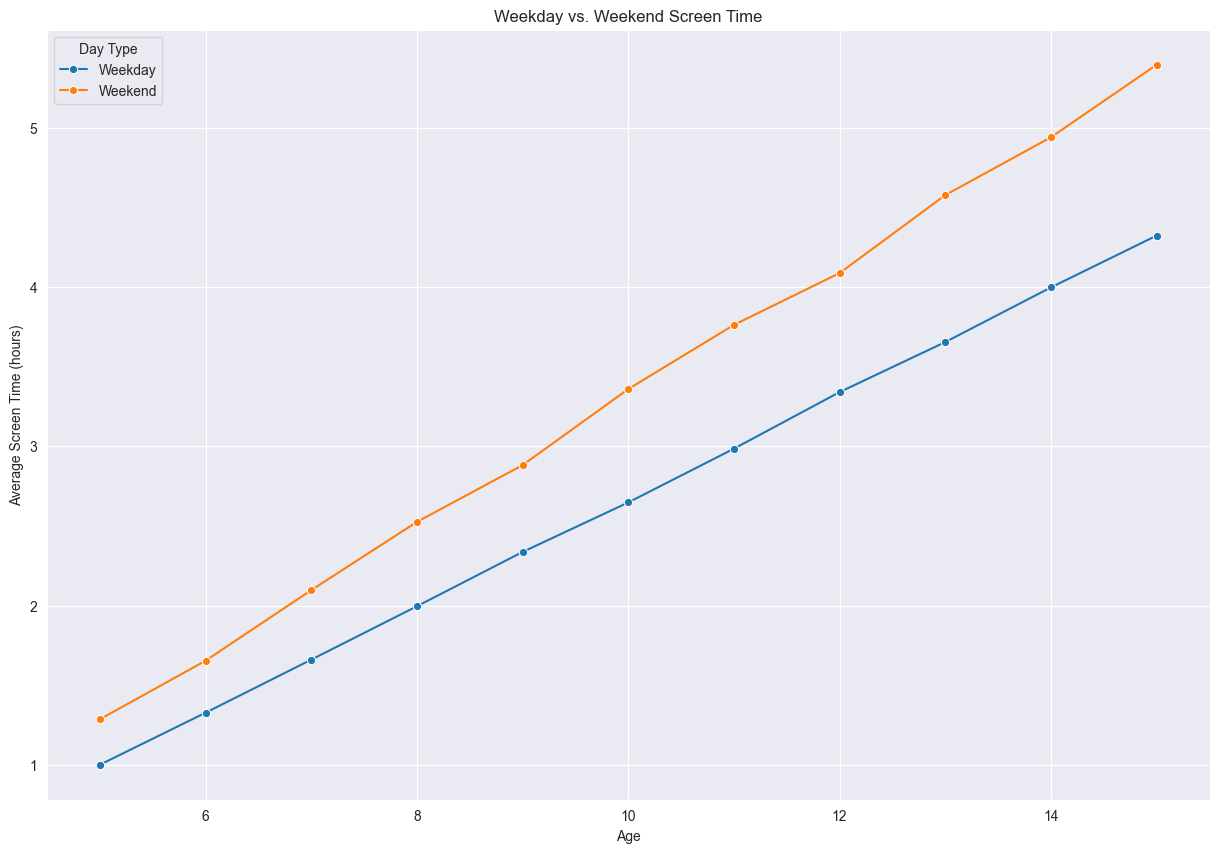

In [14]:
fig = plt.figure(figsize=(15, 10))
sns.lineplot(
    data=df,
    x='Age',
    y='Average Screen Time (hours)',
    hue='Day Type',
    marker='o',
    errorbar=None)
plt.title('Weekday vs. Weekend Screen Time')
plt.show()

Text(0.5, 1.0, 'Average by Gender and Type of Screen Type')

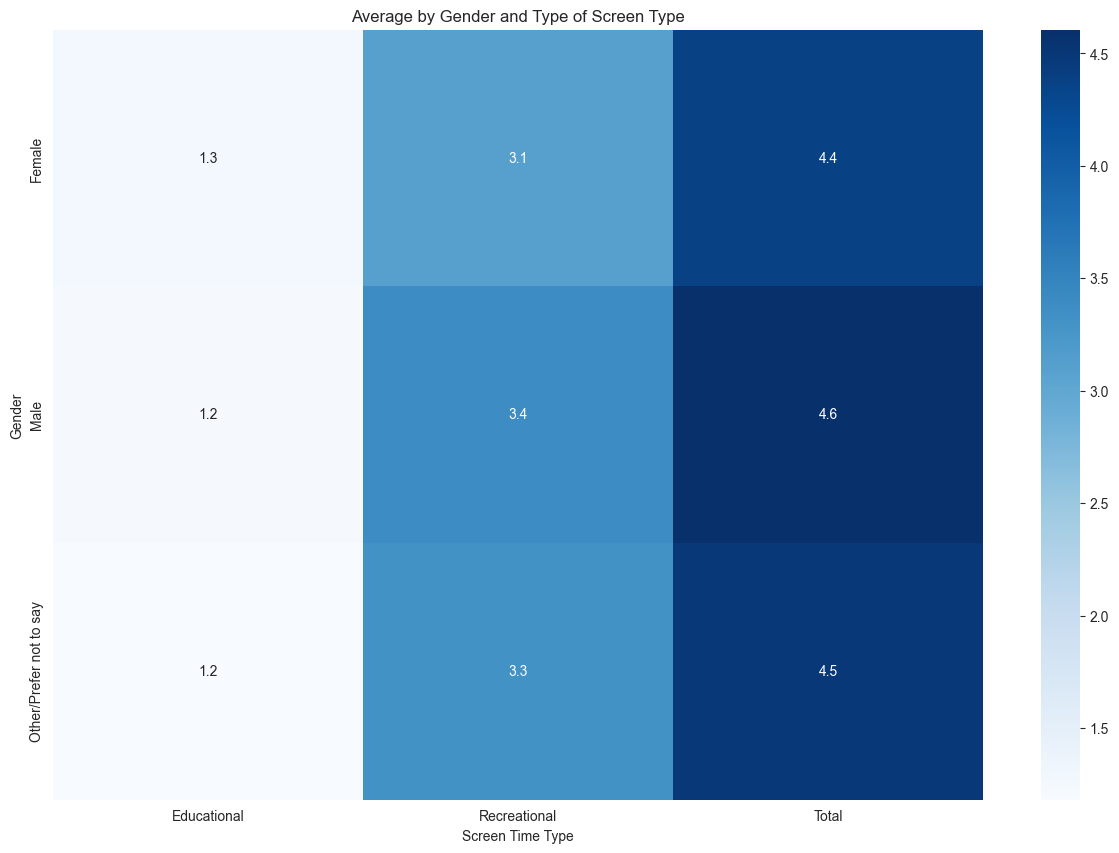

In [15]:
fig = plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, annot=True, cmap='Blues')
plt.title('Average by Gender and Type of Screen Type')

Text(0.5, 1.0, 'Sample Size by Type of Screen Time')

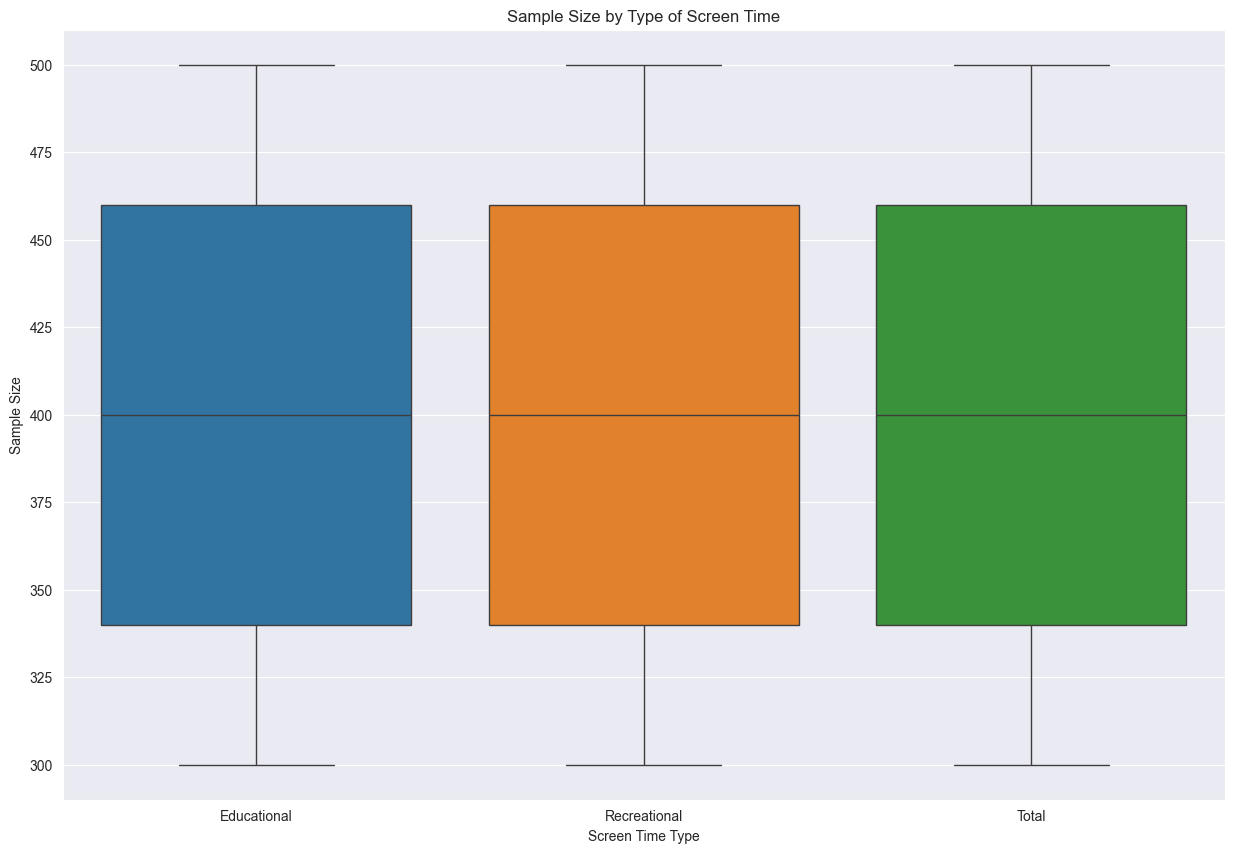

In [16]:
fig = plt.figure(figsize=(15, 10))
sns.boxplot(
    data=df,
    x='Screen Time Type',
    y='Sample Size',
    hue='Screen Time Type')
plt.title('Sample Size by Type of Screen Time')

Text(0.5, 1.0, 'Average Screen Time by Gender and Type of Screen Time')

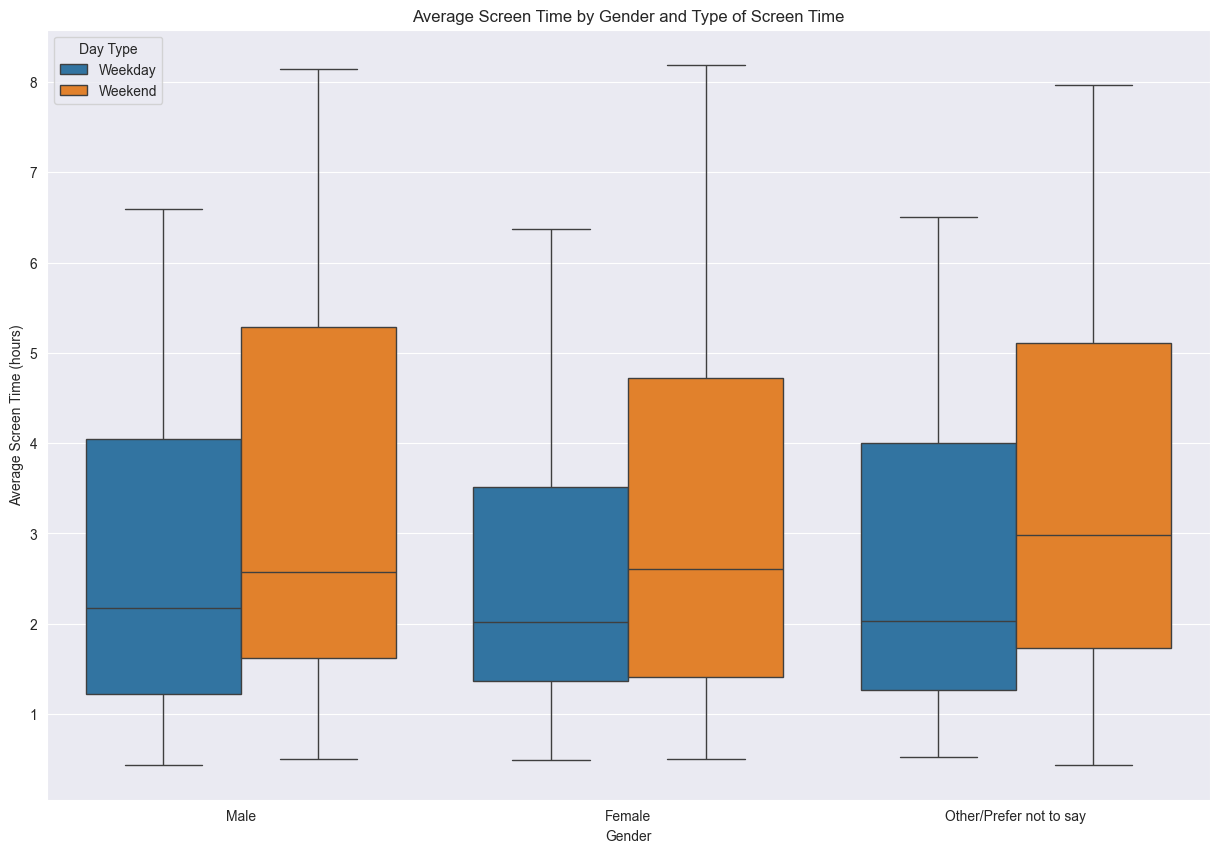

In [17]:
fig = plt.figure(figsize=(15, 10))
sns.boxplot(
    data=df,
    x='Gender',
    y='Average Screen Time (hours)',
    hue='Day Type'
)
plt.title('Average Screen Time by Gender and Type of Screen Time')